# **Entrega 2 - Aprendizaje de Máquinas**

## **Ejercicio 1 - Clasificación (C = 1.5)**

Implemente y compare los siguientes algoritmos de clasificación para la base de datos [Breast Cancer](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html). Compare el desempeño de los diferentes clasificadores dibujando las fronteras de decisión para cada uno. Al final, intente obtener un resultado similar pero no significativamente inferior a los montrados en las celdas siguientes.

**Clasificadores**
1. Clasificador kNN
2. SVM (RBF)
3. SVM (polinómico)

**Métricas:**
- F1 Score
- Recall
- Precision



**NOTA:** Los datos se generarán de acuerdo a su número se CC. \\

Al ejecutar la celda, use las variables ```Data``` y ```labels``` para resolver el trabajo

-------------------------- Info del dataset --------------------------

Data, labels shapes: (178, 2), (178,)
Nro muestras: 178
Nro caracteristicas: 2
Nro clases: 3
ID de las clases: [0 1 2]




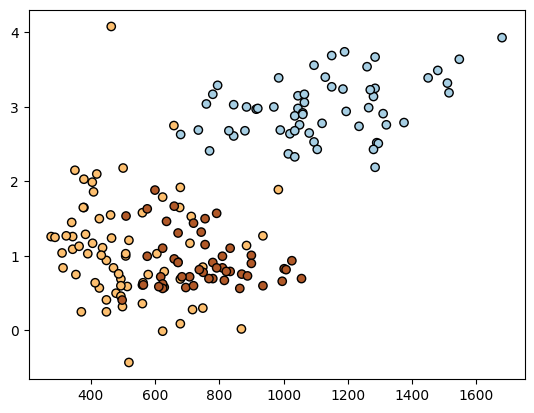

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

#@markdown **⚠️ Por favor, ingrese su número de CC**. ⬇
CC = 1001812708 #@param {type:"number"}

# n = sum(list(map(int, str(CC).strip())))
n = sum(list(map(int, str(sum(list(map(int, str(CC).strip())))).strip()))) if sum(list(map(int, str(CC).strip())))>9 else sum(list(map(int, str(CC).strip())))
m = sum(list(map(int, str(CC*2).strip())))

np.random.seed( n*m )
idx = np.random.randint(0,13,2)
data = load_wine()
labels = data.target[:]
Data = data.data[:, idx];
Data[np.where(labels==1),:] -= 1;
Data[np.where(labels==2),:] *= 1.2;

print (" Info del dataset ".center(70, '-'))
print ("\nData, labels shapes: {0}, {1}".format(Data.shape, labels.shape))
print ("Nro muestras: {0}".format(Data.shape[0]))
print ("Nro caracteristicas: {0}".format(Data.shape[1]))
print ("Nro clases: {0}".format(len(np.unique(labels))))
# print ("Nombres de las clases: {0}".format(list(data.target_names)))
print ("ID de las clases: {0}\n\n".format(np.unique(labels)))

# plot la base de datos que debera procesar
plt.scatter(Data[:, 0], Data[:, 1], c=labels, edgecolors='k', cmap=plt.cm.Paired)

Verifique las variables ```Data``` y ```labels```

In [13]:
print (Data.shape, labels.shape)

(178, 2) (178,)


In [14]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Semestre_9/machine_learning

Mounted at /content/drive
/content/drive/MyDrive/Semestre_9/machine_learning


In [15]:
# funcion para fronteras de desicion
from Tools.desicion_boundaries import desicionBoundaries
# Funcion para vermetricas
from Tools.metrics import viewMetrics

In [16]:
# Ingrese el código para realizar la clasificación con los algoritmos aquí.
# Utilice cuantas celdas de código necesite
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as kNN
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Data, labels, test_size = 0.2, random_state=5)
print(f'x train: {X_train.shape}\nx test: {X_test.shape}\ny train: {y_train.shape}\ny test: {y_test.shape}')

x train: (142, 2)
x test: (36, 2)
y train: (142,)
y test: (36,)


--> h_grid: (34, 11562)
--> v_grid: (34, 11562)
--> h_grid_ravel: (393108,)
--> v_grid_ravel: (393108,)
--> h_grid + v_grid: (393108, 2)
(393108,)
(34, 11562)
--> h_grid: (34, 11562)
--> v_grid: (34, 11562)
--> h_grid_ravel: (393108,)
--> v_grid_ravel: (393108,)
--> h_grid + v_grid: (393108, 2)
(393108,)
(34, 11562)
--> h_grid: (34, 11562)
--> v_grid: (34, 11562)
--> h_grid_ravel: (393108,)
--> v_grid_ravel: (393108,)
--> h_grid + v_grid: (393108, 2)
(393108,)
(34, 11562)


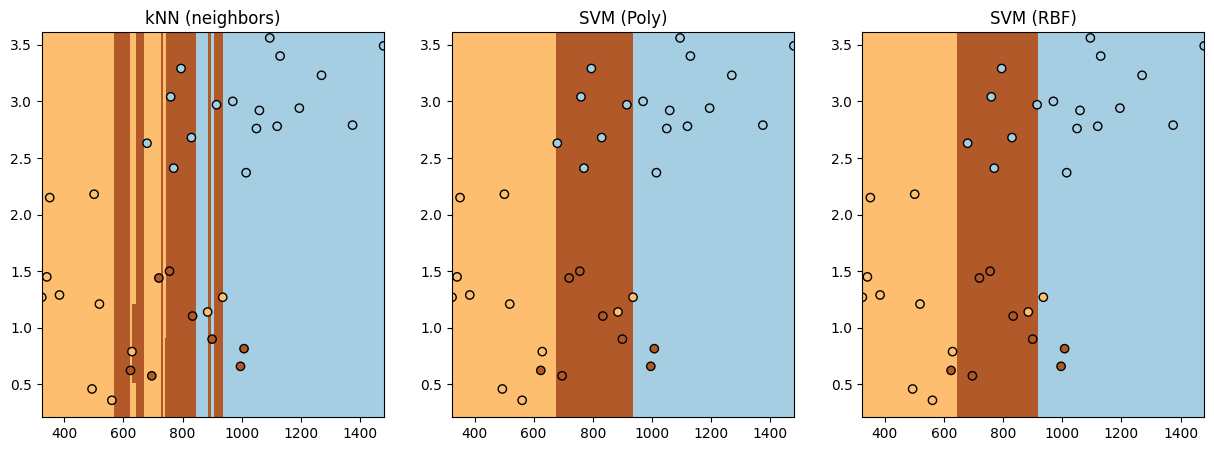

In [17]:
models = [kNN(n_neighbors = 5), SVC(kernel='poly'), SVC(kernel='rbf')]
names = ['kNN (neighbors)', 'SVM (Poly)', 'SVM (RBF)']
_, axes = plt.subplots(1, len(models), figsize=(5*len(models), 5))

predictions = {}

for model, name, ax in zip(models, names, axes):
  model.fit( X_train, y_train )
  predictions[name] = model.predict( X_test )

  # Muestre las fronteras de decisión de cada algoritmo.
  # Plot decision boundaries
  desicionBoundaries(model, X_test, y_test, res=0.1, ax=ax)
  ax.set_title(name)

In [18]:
#Metricas
for name in names:
  viewMetrics(predictions, y_test, name, viewF1=True, viewRecall=True, viewPrecision=True)

#--------- Resultados de kNN (neighbors) ---------#
-- Prec --	-- Rec --	-- F1 --	
  0.611 	  0.611 	  0.611 	
#--------- Resultados de SVM (Poly) ---------#
-- Prec --	-- Rec --	-- F1 --	
  0.694 	  0.694 	  0.694 	
#--------- Resultados de SVM (RBF) ---------#
-- Prec --	-- Rec --	-- F1 --	
  0.694 	  0.694 	  0.694 	


## **Ejercicio 2 - Clasificación (C = 1.5)**

Implemente y compare los siguientes algoritmos de clasificación para la base de datos [Digits](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html). Para esta base de datos, use cada pixel en la imágen como si fuera una característica, por lo que tendrá 64 características en total. Para el entrenamiento de los modelos, use el subconjunto ```train_Data, train_labels```. Una vez entrenados, compare el desempeño de los diferentes clasificadores calculando las métricas en el subconjunto de datos ```test_Data, test_labels```. Para cada uno de los algoritmos, modifique sus parámetros de tal forma que pueda obtener el mejor desempeño en términos de las métricas, ya que los clasificadores por defecto no necesariamente darán un buen desempeño. Al final, intente obtener un resultado similar pero no significativamente inferior a los montrados en las celdas siguientes.

\

Clasificadores:
1. Clasificador SVM (kernel polinómico)
2. Clasificador SVM (sigmoide)
3. Clasificador SVM (kernel de base radial - rbf)
4. Clasificador bayes ingenuo

Métricas:
- Accuracy
- F1 Score
- Recall
- Precision
- Matriz de confusión



**NOTA:** Los datos se generarán de acuerdo a su número se CC.

Al ejecutar la celda, use las variables ```Data``` y ```labels``` para resolver el trabajo

-------------------------- Info del dataset --------------------------

X, y shapes: (1797, 64), (1797,)
Nro muestras: 1797
Nro caracteristicas: 64
Nro clases: 10
Nombres de las clases: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Nro muestras por clases: [178 182 177 183 181 182 181 179 174 180]


----------------------- Datos de entrenamiento -----------------------

X_train, y_train shapes: (1437, 64), (1437,)
Nro muestras: 1437
Nro caracteristicas: 64
Nro muestras por clases: [141 150 139 140 142 148 152 137 142 146]


-------------------------- Datos de prueba ---------------------------

X_test, y_test shapes: (360, 64), (360,)
Nro muestras: 360
Nro caracteristicas: 64
Nro muestras por clases: [37 32 38 43 39 34 29 42 32 34]




Text(0.5, 0.98, 'Imágenes de ejemplo')

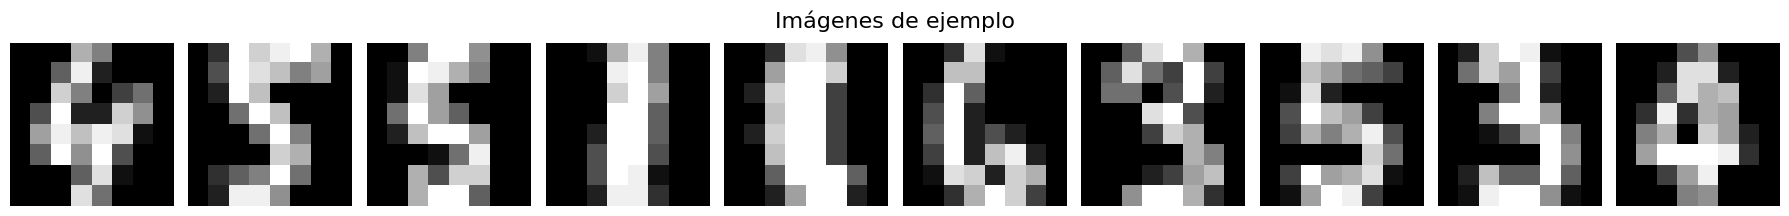

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits # Base de datos
from sklearn.model_selection import train_test_split

#@markdown **⚠️ Por favor, ingrese su número de CC**. ⬇
CC = 1001812708 #@param {type:"number"}

# n = sum(list(map(int, str(CC).strip())))
n = sum(list(map(int, str(sum(list(map(int, str(CC).strip())))).strip()))) if sum(list(map(int, str(CC).strip())))>9 else sum(list(map(int, str(CC).strip())))
m = sum(list(map(int, str(CC*2).strip())))

np.random.seed( n*m )
idx = np.random.randint(0,30)

data = load_digits()
labels = data.target
Data = data.data

train_Data, test_Data, train_labels, test_labels = train_test_split(Data, labels, test_size=0.2, random_state = idx)

print (" Info del dataset ".center(70, '-'))
print ("\nX, y shapes: {0}, {1}".format(Data.shape, labels.shape))
print ("Nro muestras: {0}".format(Data.shape[0]))
print ("Nro caracteristicas: {0}".format(Data.shape[1]))
print ("Nro clases: {0}".format(len(np.unique(labels))))
print ("Nombres de las clases: {0}".format(list(data.target_names)))
print ("Nro muestras por clases: {0}\n\n".format(np.unique(labels, return_counts=True)[1]))


print (" Datos de entrenamiento ".center(70, '-'))
print ("\nX_train, y_train shapes: {0}, {1}".format(train_Data.shape, train_labels.shape))
print ("Nro muestras: {0}".format(train_Data.shape[0]))
print ("Nro caracteristicas: {0}".format(train_Data.shape[1]))
print ("Nro muestras por clases: {0}\n\n".format(np.unique(train_labels, return_counts=True)[1]))

print (" Datos de prueba ".center(70, '-'))
print ("\nX_test, y_test shapes: {0}, {1}".format(test_Data.shape, test_labels.shape))
print ("Nro muestras: {0}".format(test_Data.shape[0]))
print ("Nro caracteristicas: {0}".format(test_Data.shape[1]))
print ("Nro muestras por clases: {0}\n\n".format(np.unique(test_labels, return_counts=True)[1]))


# plot la base de datos que debera procesar
fig, axes = plt.subplots (1, 10, figsize=(18,2.4))
for i in range(10):
  axes[i].imshow(Data[np.random.randint(0,Data.shape[0])].reshape([8,8]), cmap="gray")
  axes[i].set_axis_off()

plt.tight_layout(); fig.suptitle("Imágenes de ejemplo", fontsize = 16)

Verifique las variables ```train_Data```, ```train_labels```, ```test_Data```, ```test_labels```

In [20]:
print (train_Data.shape, train_labels.shape, test_Data.shape, test_labels.shape,)

(1437, 64) (1437,) (360, 64) (360,)


In [21]:
# Ingrese el código para realizar la clasificación con los algoritmos aquí.
# Utilice cuantas celdas de código necesite
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

models = [SVC(kernel='poly'),SVC(kernel='sigmoid'), SVC(kernel='rbf'), GaussianNB()]
names = ['SVC (Poly)', 'SVC (Sigmoid)', 'SVC (RBF)', 'Naive Gaussian']

predictions = {}

for model, name in zip(models, names):
  model.fit(train_Data, train_labels)
  predictions[name] = model.predict(test_Data)

#--------- Resultados de SVC (Poly) ---------#
-- Acc --	-- Prec --	-- Rec --	-- F1 --	
  0.994 	  0.994 	  0.994 	  0.994 	
#--------- Resultados de SVC (Sigmoid) ---------#
-- Acc --	-- Prec --	-- Rec --	-- F1 --	
  0.919 	  0.919 	  0.919 	  0.919 	
#--------- Resultados de SVC (RBF) ---------#
-- Acc --	-- Prec --	-- Rec --	-- F1 --	
  0.992 	  0.992 	  0.992 	  0.992 	
#--------- Resultados de Naive Gaussian ---------#
-- Acc --	-- Prec --	-- Rec --	-- F1 --	
  0.822 	  0.822 	  0.822 	  0.822 	


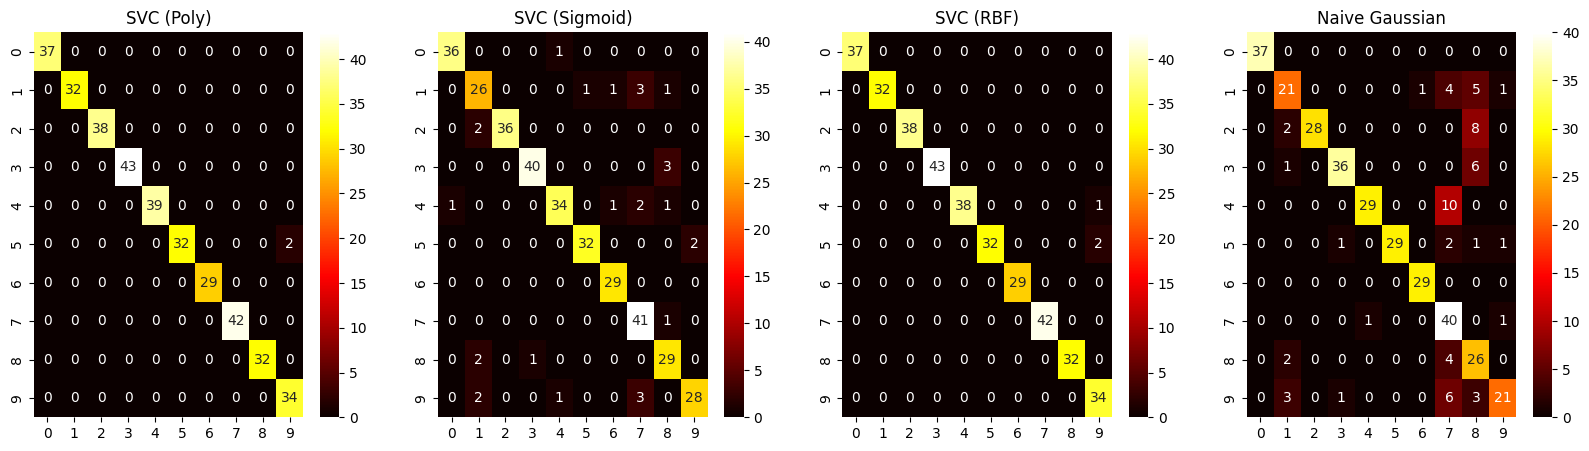

In [22]:
#Metricas
_, axes = plt.subplots(1, len(names), figsize=(5*len(names), 5))
for name, ax in zip(names, axes):
  viewMetrics(predictions, test_labels, name, viewAccuracy=True, viewPrecision=True, viewRecall=True, viewF1=True, viewCm=True, ax=ax)

## **Ejercicio 3 - Clasificación (C = 2.0)**

Implemente y compare los siguientes algoritmos de clasificación para la base de datos de ***tipos de fríjoles***, la cual contiene 16 características en total. Para el entrenamiento de los modelos listados use el subconjunto ```phone_prices_train.csv```, el cual contiene todos los datos incluídas las etiquetas. Una vez entrenados, compare el desempeño de los diferentes clasificadores calculando las siguientes métricas en el subconjunto de datos ```phone_prices_train.csv```. Para cada uno de los algoritmos, modifique sus parámetros de tal forma que pueda obtener el mejor desempeño en términos de las métricas, ya que los clasificadores por defecto no necesariamente darán un buen desempeño (por ejm, las ```SVM```). Al final, intente obtener un resultado similar pero no significativamente inferior a los montrados en las celdas siguientes.

\

**Clasificadores:**
1. Clasificador SVM (kernel polinómico)
2. Clasificador SVM (kernel de base radial - rbf)
3. Clasificador kNN
4. Clasificador bayes ingenuo

**Métricas:**
- Accuracy
- F1 Score
- Recall
- Precision
- Matriz de confusión



**NOTA:** Al ejecutar la celda, use los archivos ```phone_dataset/phone_prices_train.csv``` y ```phone_dataset/phone_prices_test.csv``` para resolver el trabajo

In [23]:
#@markdown ---------------
#@markdown ## **⚠️❗ Ejecute esta celda para descargar Price of phones dataset❗⚠️**
#@markdown ### Esta celda creará la carpeta ```/content/phone_dataset```

import os
import urllib.request
_ = urllib.request.urlretrieve("https://drive.google.com/uc?id=1zh7byFuQo8Wg-Wzpu9TGo2VzhqCR6y7K", filename='/phones.zip')
os.makedirs('/content/phone_dataset/', exist_ok=True)
!unzip -qq /phones.zip -d /content/phone_dataset
!rm -r /phones.zip
#@markdown ---------------

replace /content/phone_dataset/phone_prices_train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace /content/phone_dataset/phone_prices_test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y


--> X train: (1600, 20)
--> X test: (400, 20)
--> y train: (1600,)
--> y test: (400,)
#--------- Resultados de SVC (Poly) ---------#
-- Acc --	-- Prec --	-- Rec --	-- F1 --	
  0.743 	  0.743 	  0.743 	  0.743 	
#--------- Resultados de SVC (RBF) ---------#
-- Acc --	-- Prec --	-- Rec --	-- F1 --	
  0.858 	  0.858 	  0.858 	  0.858 	
#--------- Resultados de KNN (Neighbors) ---------#
-- Acc --	-- Prec --	-- Rec --	-- F1 --	
  0.445 	  0.445 	  0.445 	  0.445 	
#--------- Resultados de Nave Bayes Gaussian ---------#
-- Acc --	-- Prec --	-- Rec --	-- F1 --	
  0.818 	  0.818 	  0.818 	  0.818 	


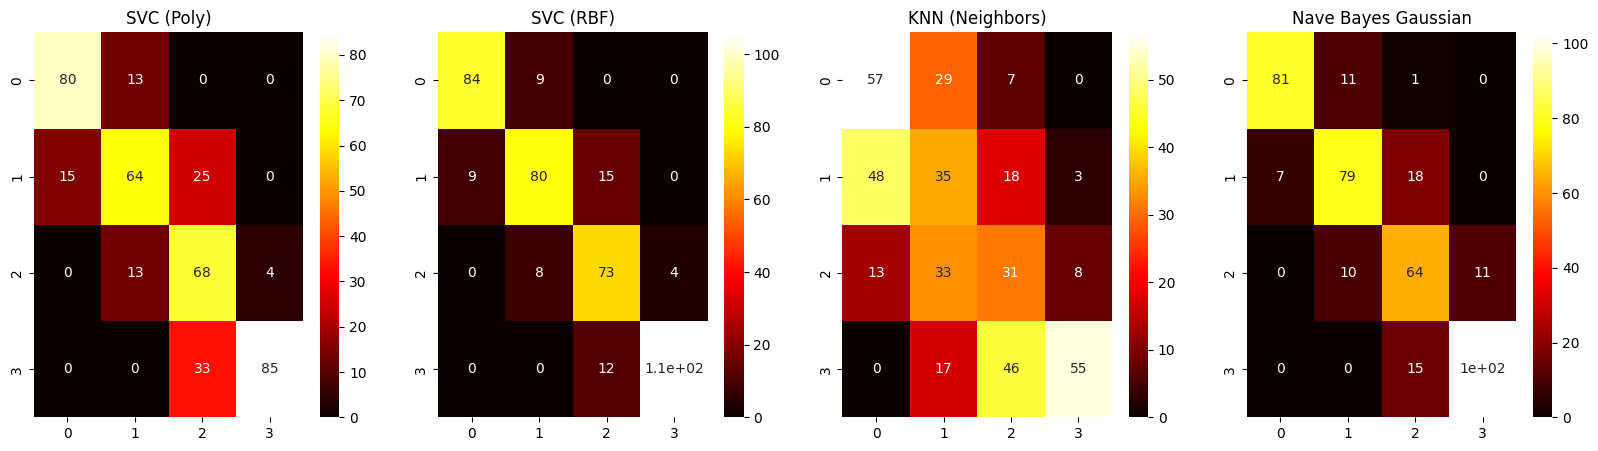

In [41]:
# Ingrese el código para realizar la clasificación con los algoritmos aquí.
# Utilice cuantas celdas de código necesite
import pandas as pd
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as kNN
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split


data_train = pd.read_csv('/content/phone_dataset/phone_prices_train.csv')
data_test = pd.read_csv('/content/phone_dataset/phone_prices_test.csv')

X_train = data_train.iloc[:, :20]
y_train = data_train['price']

X_test = data_test.iloc[:, :20]
y_test = data_test['price']

print(f'--> X train: {X_train.shape}\n--> X test: {X_test.shape}\n--> y train: {y_train.shape}\n--> y test: {y_test.shape}')

models = [SVC(kernel='poly'), SVC(kernel='rbf'), kNN(n_neighbors=5),  GaussianNB()]
names = ['SVC (Poly)', 'SVC (RBF)', 'KNN (Neighbors)', 'Nave Bayes Gaussian']

_, axes = plt.subplots(1, len(models), figsize=(5*len(models), 5))

predictions = {}

for model, name in zip(models, names):
  model.fit(X_train, y_train)
  predictions[name] = model.predict(X_test)

for name, ax in zip(names, axes):
  viewMetrics(predictions, y_test, name, viewAccuracy=True, viewPrecision=True, viewRecall=True, viewF1=True, viewCm=True, ax=ax)
# --
# Muestre y compare las métricas por cada algoritmo.
